In [240]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [21]:
dataset = pd.read_csv('train.csv')
dataset.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


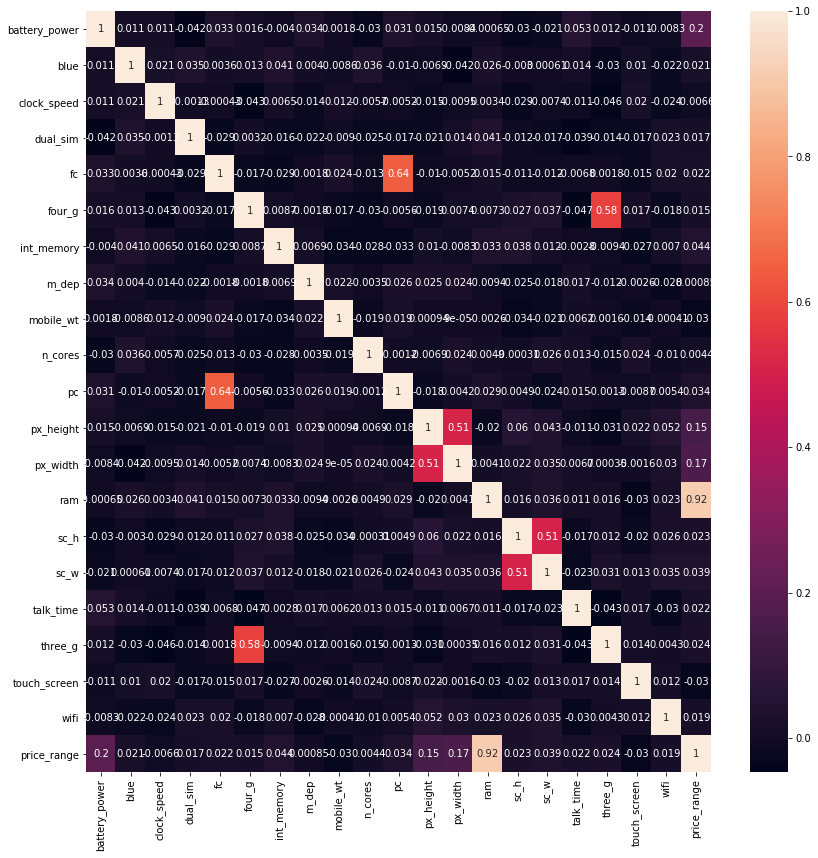

In [22]:
fig,ax = plt.subplots(figsize = (14,14))
sns.heatmap(dataset.corr(),annot=True)

(array([343., 358., 329., 293., 214., 176., 135.,  71.,  55.,  26.]),
 array([   0.,  196.,  392.,  588.,  784.,  980., 1176., 1372., 1568.,
        1764., 1960.]),
 <a list of 10 Patch objects>)

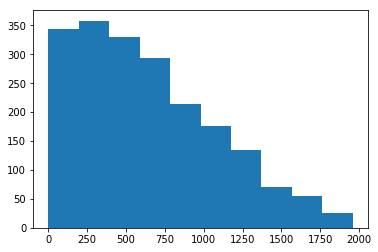

In [23]:
plt.hist(dataset['px_height'])

{'whiskers': [<matplotlib.lines.Line2D at 0x24984e52ef0>,
 'caps': [<matplotlib.lines.Line2D at 0x24984e5b518>,
 'boxes': [<matplotlib.patches.PathPatch at 0x24984e52c88>],
 'medians': [<matplotlib.lines.Line2D at 0x24984e5bd68>],
 'fliers': [<matplotlib.lines.Line2D at 0x24984e581d0>],
 'means': []}

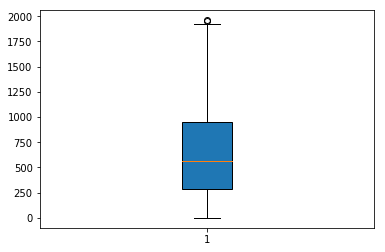

In [24]:
plt.boxplot(dataset['px_height'],vert=True,patch_artist=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x24984eb8320>,
 'caps': [<matplotlib.lines.Line2D at 0x24984eb8908>,
 'boxes': [<matplotlib.patches.PathPatch at 0x24984eb80b8>],
 'medians': [<matplotlib.lines.Line2D at 0x24984ec2198>],
 'fliers': [<matplotlib.lines.Line2D at 0x24984ec25c0>],
 'means': []}

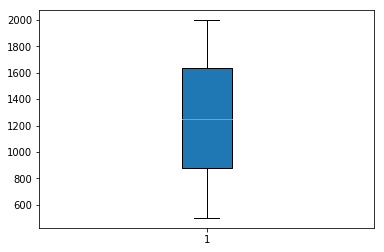

In [25]:
plt.boxplot(dataset['px_width'],vert=True,patch_artist=True)

In [26]:
dataset['px_height'].mean()

645.108

In [30]:
for i in enumerate(dataset.columns):
    print(i)

(0, 'battery_power')
(1, 'blue')
(2, 'clock_speed')
(3, 'dual_sim')
(4, 'fc')
(5, 'four_g')
(6, 'int_memory')
(7, 'm_dep')
(8, 'mobile_wt')
(9, 'n_cores')
(10, 'pc')
(11, 'px_height')
(12, 'px_width')
(13, 'ram')
(14, 'sc_h')
(15, 'sc_w')
(16, 'talk_time')
(17, 'three_g')
(18, 'touch_screen')
(19, 'wifi')
(20, 'price_range')


In [31]:
dataset.iloc[[1481,1933],11] = dataset['px_height'].mean()

{'whiskers': [<matplotlib.lines.Line2D at 0x2498505ebe0>,
 'caps': [<matplotlib.lines.Line2D at 0x2498506a208>,
 'boxes': [<matplotlib.patches.PathPatch at 0x2498505e978>],
 'medians': [<matplotlib.lines.Line2D at 0x2498506aa58>],
 'fliers': [<matplotlib.lines.Line2D at 0x2498506ae80>],
 'means': []}

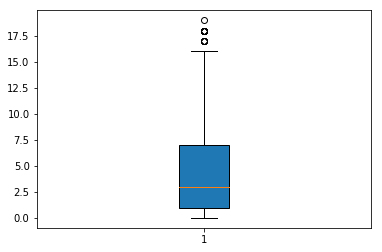

In [36]:
plt.boxplot(dataset['fc'],vert=True,patch_artist=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x2498579cc18>,
 'caps': [<matplotlib.lines.Line2D at 0x249857a4240>,
 'boxes': [<matplotlib.patches.PathPatch at 0x2498579c9b0>],
 'medians': [<matplotlib.lines.Line2D at 0x249857a4a90>],
 'fliers': [<matplotlib.lines.Line2D at 0x249857a4eb8>],
 'means': []}

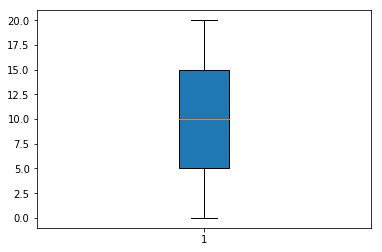

In [48]:
plt.boxplot(dataset['pc'],vert=True,patch_artist=True)

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix

In [56]:
X = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]
X.shape,y.shape

((2000, 20), (2000,))

In [69]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 

In [70]:
from sklearn.model_selection import GridSearchCV

In [71]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)
grid.fit(Xtrain,ytrain)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.2549800796812749, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.254, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s


[CV]  C=0.1, gamma=1, kernel=rbf, score=0.25502008032128515, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.2549800796812749, total=   0.2s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.254, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.25502008032128515, total=   0.2s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV]  C=0.1, gamma=0.01, kernel=rbf, score=0.2549800796812749, total=   0.1s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.254, total=   0.1s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV]  C=0.1, gamma=0.01, kernel=rbf, score=0.25502008032128515, total=   0.2s
[CV] C=0.1, gamma=0.001, kernel=rbf .............

[CV]  C=1000, gamma=1, kernel=rbf, score=0.2549800796812749, total=   0.1s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ......... C=1000, gamma=1, kernel=rbf, score=0.254, total=   0.1s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV]  C=1000, gamma=1, kernel=rbf, score=0.25502008032128515, total=   0.1s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV]  C=1000, gamma=0.1, kernel=rbf, score=0.2549800796812749, total=   0.1s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV] ....... C=1000, gamma=0.1, kernel=rbf, score=0.254, total=   0.1s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV]  C=1000, gamma=0.1, kernel=rbf, score=0.25502008032128515, total=   0.1s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................
[CV]  C=1000, gamma=0.01, kernel=rbf, score=0.2549800796812749, total=   0.1s
[CV] C=1000, gamma=0.01, kernel=rbf ............

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:   20.8s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [132]:
max_acc = 0
max_rs = 0
for i in range(1001):    
    Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,random_state = i)
    model6 = KNeighborsClassifier(n_neighbors=9)
    model6.fit(Xtrain,ytrain)
    pred = model6.predict(Xtest)
    cm = confusion_matrix(ytest,pred)
    print(cm,end = '\n\n')
    accuracy = (cm[0][0]+cm[1][1]+cm[2][2]+cm[3][3])/500
    print(i,accuracy,sep = "==>")
    if(accuracy>max_acc):
        max_acc = accuracy
        max_rs = i
    if(i%100==0):
        print("Maximum Accuracy till now: "+str(max_acc))

[[123   1   0   0]
 [  4 104   2   0]
 [  0   6 112   7]
 [  0   0   9 132]]

0==>0.942
Maximum Accuracy till now: 0.942
[[111   5   0   0]
 [  4 117   5   0]
 [  0   8 121   6]
 [  0   0  13 110]]

1==>0.918
[[120   2   0   0]
 [ 10 119   4   0]
 [  0   3 108   8]
 [  0   0   6 120]]

2==>0.934
[[116   4   0   0]
 [  4 122   6   0]
 [  0   6 106   5]
 [  0   0   9 122]]

3==>0.932
[[126   3   0   0]
 [  2 124   3   0]
 [  0   7 104   2]
 [  0   0   8 121]]

4==>0.95
[[127   2   0   0]
 [  8 107   3   0]
 [  0   9 117   3]
 [  0   0   3 121]]

5==>0.944
[[121   1   0   0]
 [  8 123   5   0]
 [  0  10 107   6]
 [  0   0  11 108]]

6==>0.918
[[131   5   0   0]
 [  4 106   0   0]
 [  0   5 123   3]
 [  0   0  10 113]]

7==>0.946
[[121   2   0   0]
 [ 10 111   5   0]
 [  0  10 112   3]
 [  0   0   9 117]]

8==>0.922
[[125   5   0   0]
 [  8 112   1   0]
 [  0   8 114   2]
 [  0   0  10 115]]

9==>0.932
[[115   3   0   0]
 [  8 116   2   0]
 [  0   7 113  14]
 [  0   0  10 112]]

10==>0.912

[[106   2   0   0]
 [  5 111   4   0]
 [  0   9 118  10]
 [  0   0   7 128]]

97==>0.926
[[122   4   0   0]
 [  5 100   5   0]
 [  0   7 117   4]
 [  0   0   9 127]]

98==>0.932
[[111   4   0   0]
 [  4 119   3   0]
 [  0   6 123   7]
 [  0   0   7 116]]

99==>0.938
[[132   3   0   0]
 [  5 112   6   0]
 [  0   9 100   9]
 [  0   0   8 116]]

100==>0.92
Maximum Accuracy till now: 0.954
[[111   4   0   0]
 [  4 116   2   0]
 [  0  10 136   6]
 [  0   0   6 105]]

101==>0.936
[[109   1   0   0]
 [  8 117   5   0]
 [  0  11 108   3]
 [  0   0   5 133]]

102==>0.934
[[127   3   0   0]
 [  4 115   2   0]
 [  0  11 106   3]
 [  0   0   8 121]]

103==>0.938
[[104   2   0   0]
 [  9 122   5   0]
 [  0  11 110   7]
 [  0   0   4 126]]

104==>0.924
[[128   4   0   0]
 [  4 108   2   0]
 [  0   5 113   6]
 [  0   0   8 122]]

105==>0.942
[[124   1   0   0]
 [  5 122   6   0]
 [  0   5 111   4]
 [  0   0  12 110]]

106==>0.934
[[132   1   0   0]
 [  3 115   3   0]
 [  0   9 101   9]
 [  0   0   7 

[[126   4   0   0]
 [  3 108   3   0]
 [  0  12 111   4]
 [  0   0   8 121]]

191==>0.932
[[127   3   0   0]
 [  5 116   8   0]
 [  0   4 112   6]
 [  0   0   8 111]]

192==>0.932
[[127   3   0   0]
 [  3 105   5   0]
 [  0   8 116   7]
 [  0   0  10 116]]

193==>0.928
[[129   3   0   0]
 [  7 124   4   0]
 [  0   5 100   8]
 [  0   0   5 115]]

194==>0.936
[[117   2   0   0]
 [  5 119   5   0]
 [  0   4 107   7]
 [  0   0   8 126]]

195==>0.938
[[125   3   0   0]
 [  4 107   5   0]
 [  0   8 110   5]
 [  0   0   3 130]]

196==>0.944
[[124   2   0   0]
 [  5 111   3   0]
 [  0   7 108   7]
 [  0   0   5 128]]

197==>0.942
[[120   3   0   0]
 [  7 121   3   0]
 [  0   6 112  11]
 [  0   0   5 112]]

198==>0.93
[[148   4   0   0]
 [  4 114   3   0]
 [  0   9 119   7]
 [  0   0   4  88]]

199==>0.938
[[129   2   0   0]
 [  7 117   9   0]
 [  0   3 112   3]
 [  0   0   6 112]]

200==>0.94
Maximum Accuracy till now: 0.956
[[141   3   0   0]
 [  2 122   5   0]
 [  0   4 110   8]
 [  0   0   

[[116   2   0   0]
 [  4 112   6   0]
 [  0   4 115   4]
 [  0   0   8 129]]

283==>0.944
[[118   3   0   0]
 [  6 117   6   0]
 [  0   9 111   3]
 [  0   0   5 122]]

284==>0.936
[[120   2   0   0]
 [  3 118   7   0]
 [  0   6 112   6]
 [  0   0   7 119]]

285==>0.938
[[124   5   0   0]
 [  2 124   1   0]
 [  0   6 117   8]
 [  0   0   2 111]]

286==>0.952
[[122   3   0   0]
 [  9 117   6   0]
 [  0   5 106   3]
 [  0   0  10 119]]

287==>0.928
[[120   5   0   0]
 [  5 116   7   0]
 [  0   6 103   8]
 [  0   0   8 122]]

288==>0.922
[[127   4   0   0]
 [  3 115   5   0]
 [  0   9 101   5]
 [  0   0   5 126]]

289==>0.938
[[128   9   0   0]
 [  9  99   4   0]
 [  0   6 108   8]
 [  0   0   5 124]]

290==>0.918
[[125   5   0   0]
 [  8 112   4   0]
 [  0   5 114   6]
 [  0   0   8 113]]

291==>0.928
[[121   5   0   0]
 [  3 116   5   0]
 [  0  10 122   6]
 [  0   0   5 107]]

292==>0.932
[[119   1   0   0]
 [  7 113   4   0]
 [  0   6 115  12]
 [  0   0   4 119]]

293==>0.932
[[112   3 

[[119   4   0   0]
 [  4 117   1   0]
 [  0   8 116   8]
 [  0   0   8 115]]

378==>0.934
[[129   4   0   0]
 [  4 110   3   0]
 [  0   9  99   4]
 [  0   0   9 129]]

379==>0.934
[[126   5   0   0]
 [  8 124   8   0]
 [  0   7  92   6]
 [  0   0   5 119]]

380==>0.922
[[110   0   0   0]
 [  3 132   4   0]
 [  0   5 106   7]
 [  0   0  10 123]]

381==>0.942
[[108   5   0   0]
 [  6 118   2   0]
 [  0   9 118   8]
 [  0   0   6 120]]

382==>0.928
[[125   2   0   0]
 [  7 114   6   0]
 [  0   8 113   7]
 [  0   0   6 112]]

383==>0.928
[[119   4   0   0]
 [  5 116   7   0]
 [  0   9 106   8]
 [  0   0  11 115]]

384==>0.912
[[124   2   0   0]
 [  6 117   3   0]
 [  0   8  98   3]
 [  0   0  10 129]]

385==>0.936
[[106   1   0   0]
 [  6 129   7   0]
 [  0   8 111   7]
 [  0   0  12 113]]

386==>0.918
[[116   9   0   0]
 [  7 112   5   0]
 [  0   7 113   5]
 [  0   0   6 120]]

387==>0.922
[[127   2   0   0]
 [  9 120   4   0]
 [  0   2 112   6]
 [  0   0   9 109]]

388==>0.936
[[124   5 

[[134   2   0   0]
 [  3 117   6   0]
 [  0   2 103  10]
 [  0   0   9 114]]

473==>0.936
[[123   5   0   0]
 [  4 119   6   0]
 [  0  10 108   4]
 [  0   0   8 113]]

474==>0.926
[[107   1   0   0]
 [  8 121   7   0]
 [  0   6 121   3]
 [  0   0   9 117]]

475==>0.932
[[132   4   0   0]
 [  1 124  12   0]
 [  0   2 108   3]
 [  0   0   6 108]]

476==>0.944
[[122   8   0   0]
 [  7 107   6   0]
 [  0   3 116   7]
 [  0   0   3 121]]

477==>0.932
[[122   5   0   0]
 [  1 120   4   0]
 [  0  11 107   5]
 [  0   0   6 119]]

478==>0.936
[[124   3   0   0]
 [  4 121   2   0]
 [  0   8 109   9]
 [  0   0   6 114]]

479==>0.936
[[116   5   0   0]
 [  7 123   7   0]
 [  0   7 107   3]
 [  0   0   8 117]]

480==>0.926
[[116   2   0   0]
 [  4 110   5   0]
 [  0  10 120   8]
 [  0   0  11 114]]

481==>0.92
[[121   3   0   0]
 [  8 118   7   0]
 [  0   3 117   4]
 [  0   0  11 108]]

482==>0.928
[[118   2   0   0]
 [  9 112   2   0]
 [  0   5 109   8]
 [  0   0   9 126]]

483==>0.93
[[107   3   

[[128   5   0   0]
 [  7 104   7   0]
 [  0   7 119   6]
 [  0   0   6 111]]

570==>0.924
[[114   2   0   0]
 [  5 129   3   0]
 [  0   5 112   8]
 [  0   0   9 113]]

571==>0.936
[[120   2   0   0]
 [  4 121   5   0]
 [  0  10 112   6]
 [  0   0   7 113]]

572==>0.932
[[116   1   0   0]
 [  8 116  11   0]
 [  0   9 112   7]
 [  0   0  10 110]]

573==>0.908
[[128   2   0   0]
 [  5 116   4   0]
 [  0   9 105   8]
 [  0   0  10 113]]

574==>0.924
[[125   6   0   0]
 [  4 116   2   0]
 [  0  10 100   5]
 [  0   0  13 119]]

575==>0.92
[[112   3   0   0]
 [  5 118   6   0]
 [  0   4 100  10]
 [  0   0   7 135]]

576==>0.93
[[119   2   0   0]
 [ 10 120   4   0]
 [  0  10 110   4]
 [  0   0   9 112]]

577==>0.922
[[124   2   0   0]
 [  3 127   3   0]
 [  0   8 114  10]
 [  0   0   6 103]]

578==>0.936
[[117   2   0   0]
 [  3 122   3   0]
 [  0   9 111  11]
 [  0   0   4 118]]

579==>0.936
[[123   8   0   0]
 [  4 119   1   0]
 [  0   7 103   3]
 [  0   0  11 121]]

580==>0.932
[[126   2   

[[127   4   0   0]
 [  3 104   5   0]
 [  0  12 110   5]
 [  0   0  13 117]]

661==>0.916
[[107   3   0   0]
 [  7 131   3   0]
 [  0   4 115   8]
 [  0   0   5 117]]

662==>0.94
[[108   3   0   0]
 [  7 118   4   0]
 [  0  12 116   6]
 [  0   0   4 122]]

663==>0.928
[[128   1   0   0]
 [  5 121   4   0]
 [  0   5 117   3]
 [  0   0  13 103]]

664==>0.938
[[133   5   0   0]
 [  8 101  10   0]
 [  0   5  94  11]
 [  0   0   5 128]]

665==>0.912
[[120   5   0   0]
 [  7 118   1   0]
 [  0   9 115   3]
 [  0   0   7 115]]

666==>0.936
[[122   3   0   0]
 [  9 121   4   0]
 [  0   6 110   5]
 [  0   0  10 110]]

667==>0.926
[[116   4   0   0]
 [ 10 108   3   0]
 [  0   4 107   4]
 [  0   0  10 134]]

668==>0.93
[[127   0   0   0]
 [  5 125   5   0]
 [  0   8 101   5]
 [  0   0  14 110]]

669==>0.926
[[115   4   0   0]
 [  1 111   5   0]
 [  0   8 120   7]
 [  0   0  10 119]]

670==>0.93
[[129   3   0   0]
 [  5 113   7   0]
 [  0   5 119   4]
 [  0   0  10 105]]

671==>0.932
[[120   7   0

[[117   1   0   0]
 [  5 121   1   0]
 [  0   7 111   5]
 [  0   0  14 118]]

757==>0.934
[[114   4   0   0]
 [  5 108   4   0]
 [  0   6 109  12]
 [  0   0   6 132]]

758==>0.926
[[121   3   0   0]
 [  4 113   4   0]
 [  0   9 115   5]
 [  0   0  11 115]]

759==>0.928
[[120   2   0   0]
 [  2 107   5   0]
 [  0   7 116   6]
 [  0   0   8 127]]

760==>0.94
[[127   1   0   0]
 [  8 113   6   0]
 [  0  14 120   3]
 [  0   0   9  99]]

761==>0.918
[[127   5   0   0]
 [  4 114   0   0]
 [  0   7 111  10]
 [  0   0   7 115]]

762==>0.934
[[120   3   0   0]
 [  9 120   5   0]
 [  0   7 106   3]
 [  0   0   5 122]]

763==>0.936
[[138   3   0   0]
 [  8 102   2   0]
 [  0  10 106   3]
 [  0   0  15 113]]

764==>0.918
[[101   6   0   0]
 [  4 122   6   0]
 [  0  10 101   7]
 [  0   0   7 136]]

765==>0.92
[[120   6   0   0]
 [  6 119   5   0]
 [  0   7 110   4]
 [  0   0  10 113]]

766==>0.924
[[119   4   0   0]
 [  2 114   6   0]
 [  0   8 116   8]
 [  0   0  11 112]]

767==>0.922
[[123   8   

856==>0.936
[[112   3   0   0]
 [  2 103   3   0]
 [  0  10 112   1]
 [  0   0  16 138]]

857==>0.93
[[128   3   0   0]
 [  3 107   2   0]
 [  0   9 112   9]
 [  0   0   2 125]]

858==>0.944
[[115   5   0   0]
 [  3 116   4   0]
 [  0   6 110   5]
 [  0   0  11 125]]

859==>0.932
[[131   2   0   0]
 [  4 114   3   0]
 [  0   5 118   9]
 [  0   0   8 106]]

860==>0.938
[[115   5   0   0]
 [  5 111   4   0]
 [  0   8 107   8]
 [  0   0  11 126]]

861==>0.918
[[121   0   0   0]
 [  1 112   2   0]
 [  0  11 108   3]
 [  0   0  10 132]]

862==>0.946
[[114   5   0   0]
 [  3  93   2   0]
 [  0   7 131   3]
 [  0   0   6 136]]

863==>0.948
[[110   4   0   0]
 [  5 134   4   0]
 [  0   7 104   6]
 [  0   0  12 114]]

864==>0.924
[[121   4   0   0]
 [  6 107   4   0]
 [  0  12 119   8]
 [  0   0   8 111]]

865==>0.916
[[127   5   0   0]
 [  5 109   4   0]
 [  0   7 112   6]
 [  0   0   3 122]]

866==>0.94
[[130   1   0   0]
 [  6 119  10   0]
 [  0   6  99   8]
 [  0   0   4 117]]

867==>0.93
[

[[121   4   0   0]
 [  4 102   3   0]
 [  0   5 123   6]
 [  0   0  12 120]]

948==>0.932
[[128   3   0   0]
 [  8 100   8   0]
 [  0   9 101   4]
 [  0   0   7 132]]

949==>0.922
[[134   2   0   0]
 [  4 113   3   0]
 [  0   9 100   3]
 [  0   0   7 125]]

950==>0.944
[[132   2   0   0]
 [  7 100   4   0]
 [  0  14 120   9]
 [  0   0   9 103]]

951==>0.91
[[121   6   0   0]
 [  4 112   2   0]
 [  0  10 114   7]
 [  0   0   7 117]]

952==>0.928
[[121   2   0   0]
 [  7 117   6   0]
 [  0   6 101   6]
 [  0   0   7 127]]

953==>0.932
[[111   3   0   0]
 [  7 113   0   0]
 [  0   9 111   8]
 [  0   0  12 126]]

954==>0.922
[[130   1   0   0]
 [  5 108   8   0]
 [  0   5 116  10]
 [  0   0   9 108]]

955==>0.924
[[118   4   0   0]
 [  4 116   3   0]
 [  0   6 106   7]
 [  0   0   8 128]]

956==>0.936
[[120   5   0   0]
 [  1  99   3   0]
 [  0   7 111   5]
 [  0   0  10 139]]

957==>0.938
[[122   6   0   0]
 [  8 109   6   0]
 [  0  10 110   2]
 [  0   0  11 116]]

958==>0.914
[[120   5  

In [133]:
max_acc,max_rs

(0.964, 612)

In [241]:
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,random_state = 612)
model6 = KNeighborsClassifier(n_neighbors=9)
model6.fit(Xtrain,ytrain)
pred5 = model6.predict(Xtest)
cm = confusion_matrix(ytest,pred5)
print(cm,end = '\n\n')
accuracy = (cm[0][0]+cm[1][1]+cm[2][2]+cm[3][3])/500
print(accuracy,sep = "==>")

[[120   1   0   0]
 [  2 120   0   0]
 [  0   7 123   2]
 [  0   0   5 120]]

0.966


In [242]:
pred1 = grid.predict(Xtest)
cm = confusion_matrix(ytest,pred1)
print(cm,end = '\n\n')
accuracy = (cm[0][0]+cm[1][1]+cm[2][2]+cm[3][3])/500
print(accuracy,sep = "==>")

ValueError: X.shape[1] = 4 should be equal to 20, the number of features at training time

In [140]:
predictions = [pred0,pred1,pred2,pred3,pred4,pred5]

In [243]:
pred0.shape

(500,)

In [146]:
l = []

In [147]:
from statistics import mode
mode([1, 1, 2, 3, 3, 3, 3, 4])

3

In [149]:
pred0[0]

3

In [244]:
import statistics
def find_min_mode(list1):
    list_table = statistics._counts(list1)
    len_table = len(list_table)

    if len_table == 1:
        max_mode = statistics.mode(list1)
    else:
        new_list = []
        for i in range(len_table):
            new_list.append(list_table[i][0])
        max_mode = min(new_list) # use the max value here
    return max_mode

In [253]:
import math
final_pred = np.array([])
for i in range(0,len(Xtest)):
    print(i,math.ceil((0.1*pred0[i]+0.1*pred1[i]+0.1*pred2[i]+0.2*pred3[i]+0.4*pred4[i]+0.1*pred5[i])/6),sep="==>")
    final_pred = np.append(final_pred, math.ceil(0.1*pred0[i]+0.1*pred1[i]+0.1*pred2[i]+0.2*pred3[i]+0.4*pred4[i]+0.1*pred5[i])/6)

0==>1
1==>1
2==>1
3==>1
4==>1
5==>1
6==>1
7==>1
8==>1
9==>1
10==>1
11==>1
12==>1
13==>1
14==>1
15==>1
16==>1
17==>1
18==>1
19==>1
20==>1
21==>1
22==>1
23==>1
24==>1
25==>1
26==>1
27==>1
28==>1
29==>1
30==>1
31==>1
32==>1
33==>1
34==>1
35==>1
36==>1
37==>1
38==>1
39==>1
40==>1
41==>1
42==>1
43==>1
44==>1
45==>1
46==>1
47==>1
48==>1
49==>1
50==>1
51==>1
52==>1
53==>1
54==>1
55==>1
56==>1
57==>1
58==>1
59==>1
60==>1
61==>1
62==>1
63==>1
64==>1
65==>1
66==>1
67==>1
68==>1
69==>1
70==>1
71==>1
72==>1
73==>1
74==>1
75==>1
76==>1
77==>1
78==>1
79==>1
80==>1
81==>1
82==>1
83==>1
84==>1
85==>1
86==>1
87==>1
88==>1
89==>1
90==>1
91==>1
92==>1
93==>1
94==>1
95==>1
96==>1
97==>1
98==>1
99==>1
100==>1
101==>1
102==>1
103==>1
104==>1
105==>1
106==>1
107==>1
108==>1
109==>1
110==>1
111==>1
112==>1
113==>1
114==>1
115==>1
116==>1
117==>1
118==>1
119==>1
120==>1
121==>1
122==>1
123==>1
124==>1
125==>1
126==>1
127==>1
128==>1
129==>1
130==>1
131==>1
132==>1
133==>1
134==>1
135==>1
136==>1
137==>1
138==>

In [192]:
confusion_matrix(final_pred,ytest)

array([[11, 18, 13, 15],
       [85, 93, 89, 99],
       [22, 16, 21, 18],
       [ 0,  0,  0,  0]], dtype=int64)

In [167]:
a = [1,2,3,1,2,3,1,2,3]
find_max_mode(a)

3

In [180]:
max_acc = 0
max_rs = 0
for i in range(1001):    
    Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,random_state = i)
    #model6 = KNeighborsClassifier(n_neighbors=9)
    model5.fit(Xtrain,ytrain)
    pred_dc_rf = model4.predict(Xtest)
    cm = confusion_matrix(ytest,pred_dc_rf)
    print(cm,end = '\n\n')
    accuracy = (cm[0][0]+cm[1][1]+cm[2][2]+cm[3][3])/500
    print(i,accuracy,sep = "==>")
    if(accuracy>max_acc):
        max_acc = accuracy
        max_rs = i
    if(i%100==0):
        print("Maximum Accuracy till now: "+str(max_acc))

[[121   3   0   0]
 [  1 107   2   0]
 [  0   1 121   3]
 [  0   0   4 137]]

0==>0.972
Maximum Accuracy till now: 0.972
[[111   5   0   0]
 [  1 124   1   0]
 [  0   2 132   1]
 [  0   0   3 120]]

1==>0.974
[[121   1   0   0]
 [  1 131   1   0]
 [  0   3 112   4]
 [  0   0   0 126]]

2==>0.98
[[116   4   0   0]
 [  1 128   3   0]
 [  0   3 112   2]
 [  0   0   1 130]]

3==>0.972
[[124   5   0   0]
 [  2 126   1   0]
 [  0   4 108   1]
 [  0   0   5 124]]

4==>0.964
[[123   6   0   0]
 [  1 115   2   0]
 [  0   2 125   2]
 [  0   0   6 118]]

5==>0.962
[[118   4   0   0]
 [  2 130   4   0]
 [  0   3 116   4]
 [  0   0   6 113]]

6==>0.954
[[133   3   0   0]
 [  2 104   4   0]
 [  0   1 129   1]
 [  0   0   6 117]]

7==>0.966
[[120   3   0   0]
 [  2 121   3   0]
 [  0   5 120   0]
 [  0   0   1 125]]

8==>0.972
[[125   5   0   0]
 [  2 116   3   0]
 [  0   2 122   0]
 [  0   0   2 123]]

9==>0.972
[[115   3   0   0]
 [  1 123   2   0]
 [  0   2 128   4]
 [  0   0   2 120]]

10==>0.972

[[115   2   0   0]
 [  1 135   2   0]
 [  0   4 128   4]
 [  0   0   3 106]]

92==>0.968
[[124   4   0   0]
 [  4 125   2   0]
 [  0   1 138   2]
 [  0   0   3  97]]

93==>0.968
[[112   3   0   0]
 [  2 121   2   0]
 [  0   2 131   2]
 [  0   0   1 124]]

94==>0.976
[[126   5   0   0]
 [  1 118   1   0]
 [  0   3 114   1]
 [  0   0   2 129]]

95==>0.974
[[121   5   0   0]
 [  0 117   2   0]
 [  0   5 125   1]
 [  0   0   2 122]]

96==>0.97
[[106   2   0   0]
 [  2 116   2   0]
 [  0   0 134   3]
 [  0   0   1 134]]

97==>0.98
[[120   6   0   0]
 [  3 106   1   0]
 [  0   3 123   2]
 [  0   0   2 134]]

98==>0.966
[[111   4   0   0]
 [  5 119   2   0]
 [  0   3 131   2]
 [  0   0   2 121]]

99==>0.964
[[130   5   0   0]
 [  1 120   2   0]
 [  0   2 116   0]
 [  0   0   1 123]]

100==>0.978
Maximum Accuracy till now: 0.986
[[106   9   0   0]
 [  1 119   2   0]
 [  0   2 148   2]
 [  0   0   2 109]]

101==>0.964
[[107   3   0   0]
 [  1 128   1   0]
 [  0   3 117   2]
 [  0   0   1 137]]


[[126   3   0   0]
 [  2 126   0   0]
 [  0   2 120   1]
 [  0   0   3 117]]

184==>0.978
[[123   5   0   0]
 [  3 126   2   0]
 [  0   4 116   2]
 [  0   0   5 114]]

185==>0.958
[[120   7   0   0]
 [  1 110   3   0]
 [  0   2 125   1]
 [  0   0   0 131]]

186==>0.972
[[113   7   0   0]
 [  4 116   2   0]
 [  0   4 113   2]
 [  0   0   3 136]]

187==>0.956
[[126   6   0   0]
 [  2 123   2   0]
 [  0   1 104   3]
 [  0   0   2 131]]

188==>0.968
[[104   9   0   0]
 [  3 125   1   0]
 [  0   1 123   1]
 [  0   0   1 132]]

189==>0.968
[[118   3   0   0]
 [  2 135   4   0]
 [  0   3 108   4]
 [  0   0   4 119]]

190==>0.96
[[122   8   0   0]
 [  1 111   2   0]
 [  0   4 123   0]
 [  0   0   3 126]]

191==>0.964
[[125   5   0   0]
 [  1 127   1   0]
 [  0   1 119   2]
 [  0   0   4 115]]

192==>0.972
[[125   5   0   0]
 [  2 109   2   0]
 [  0   2 125   4]
 [  0   0   3 123]]

193==>0.964
[[127   5   0   0]
 [  3 131   1   0]
 [  0   2 107   4]
 [  0   0   2 118]]

194==>0.966
[[118   1  

[[116   4   0   0]
 [  1 120   1   0]
 [  0   2 123   4]
 [  0   0   1 128]]

278==>0.974
[[129   9   0   0]
 [  2 120   1   0]
 [  0   0 118   2]
 [  0   0   2 117]]

279==>0.968
[[136   5   0   0]
 [  0 124   1   0]
 [  0   3 101   4]
 [  0   0   3 123]]

280==>0.968
[[130   4   0   0]
 [  0 125   1   0]
 [  0   2 121   4]
 [  0   0   2 111]]

281==>0.974
[[129   3   0   0]
 [  2 101   2   0]
 [  0   3 148   2]
 [  0   0   3 107]]

282==>0.97
[[116   2   0   0]
 [  3 118   1   0]
 [  0   2 119   2]
 [  0   0   1 136]]

283==>0.978
[[118   3   0   0]
 [  0 128   1   0]
 [  0   4 117   2]
 [  0   0   5 122]]

284==>0.97
[[119   3   0   0]
 [  1 124   3   0]
 [  0   1 118   5]
 [  0   0   2 124]]

285==>0.97
[[124   5   0   0]
 [  1 125   1   0]
 [  0   1 127   3]
 [  0   0   5 108]]

286==>0.968
[[121   4   0   0]
 [  2 128   2   0]
 [  0   2 112   0]
 [  0   0   3 126]]

287==>0.974
[[117   8   0   0]
 [  5 121   2   0]
 [  0   2 112   3]
 [  0   0   6 124]]

288==>0.948
[[127   4   0

370==>0.966
[[120   2   0   0]
 [  2 124   2   0]
 [  0   2 120   4]
 [  0   0   2 122]]

371==>0.972
[[120   1   0   0]
 [  2 121   1   0]
 [  0   2 125   1]
 [  0   0   5 122]]

372==>0.976
[[116   4   0   0]
 [  1 124   0   0]
 [  0   1 128   1]
 [  0   0   2 123]]

373==>0.982
[[110   5   0   0]
 [  3 116   2   0]
 [  0   2 127   3]
 [  0   0   8 124]]

374==>0.954
[[128   5   0   0]
 [  3 112   3   0]
 [  0   4 109   2]
 [  0   0   3 131]]

375==>0.96
[[114   5   0   0]
 [  2 125   2   0]
 [  0   2 123   2]
 [  0   0   5 120]]

376==>0.964
[[119   2   0   0]
 [  2 120   1   0]
 [  0   1 115   2]
 [  0   0   2 136]]

377==>0.98
[[117   6   0   0]
 [  3 119   0   0]
 [  0   2 128   2]
 [  0   0   3 120]]

378==>0.968
[[131   2   0   0]
 [  2 113   2   0]
 [  0   4 105   3]
 [  0   0   2 136]]

379==>0.97
[[126   5   0   0]
 [  1 137   2   0]
 [  0   1 102   2]
 [  0   0   2 122]]

380==>0.974
[[107   3   0   0]
 [  1 137   1   0]
 [  0   3 114   1]
 [  0   0   1 132]]

381==>0.98
[[

[[122   4   0   0]
 [  1 118   2   0]
 [  0   1 108   1]
 [  0   0   4 139]]

466==>0.974
[[115   3   0   0]
 [  2 118   1   0]
 [  0   3 120   4]
 [  0   0   2 132]]

467==>0.97
[[132   4   0   0]
 [  1 116   0   0]
 [  0   1 123   1]
 [  0   0   6 116]]

468==>0.974
[[119   4   0   0]
 [  3 123   0   0]
 [  0   2 111   2]
 [  0   0   5 131]]

469==>0.968
[[119   3   0   0]
 [  3 115   0   0]
 [  0   7 114   1]
 [  0   0   1 137]]

470==>0.97
[[118   3   0   0]
 [  2 126   3   0]
 [  0   3 111   1]
 [  0   0   5 128]]

471==>0.966
[[103   4   0   0]
 [  2 125   0   0]
 [  0   1 105   2]
 [  0   0   4 154]]

472==>0.974
[[131   5   0   0]
 [  3 122   1   0]
 [  0   3 109   3]
 [  0   0   3 120]]

473==>0.964
[[123   5   0   0]
 [  1 124   4   0]
 [  0   0 120   2]
 [  0   0   4 117]]

474==>0.968
[[106   2   0   0]
 [  2 133   1   0]
 [  0   1 127   2]
 [  0   0   3 123]]

475==>0.978
[[131   5   0   0]
 [  2 134   1   0]
 [  0   2 110   1]
 [  0   0   3 111]]

476==>0.972
[[126   4   

[[128   2   0   0]
 [  0 122   2   0]
 [  0   0 121   2]
 [  0   0   1 122]]

560==>0.986
[[116   4   0   0]
 [  4 125   1   0]
 [  0   2 126   5]
 [  0   0   3 114]]

561==>0.962
[[112   3   0   0]
 [  2 128   3   0]
 [  0   0 109   1]
 [  0   0   1 141]]

562==>0.98
[[124   4   0   0]
 [  5 112   2   0]
 [  0   6 121   1]
 [  0   0   3 122]]

563==>0.958
[[122   2   0   0]
 [  2 117   2   0]
 [  0   3 123   3]
 [  0   0   4 122]]

564==>0.968
[[116   5   0   0]
 [  2 125   4   0]
 [  0   4 111   1]
 [  0   0   1 131]]

565==>0.966
[[118   6   0   0]
 [  4 128   3   0]
 [  0   2 125   4]
 [  0   0   0 110]]

566==>0.962
[[124   3   0   0]
 [  4 120   1   0]
 [  0   4 121   0]
 [  0   0   3 120]]

567==>0.97
[[140   8   0   0]
 [  3 105   1   0]
 [  0   2 114   3]
 [  0   0   3 121]]

568==>0.96
[[110   5   0   0]
 [  4 125   2   0]
 [  0   1 121   2]
 [  0   0   4 126]]

569==>0.964
[[125   8   0   0]
 [  4 110   4   0]
 [  0   1 130   1]
 [  0   0   1 116]]

570==>0.962
[[110   6   0

[[124   5   0   0]
 [  1 119   0   0]
 [  0   2 120   2]
 [  0   0   2 125]]

651==>0.976
[[126   4   0   0]
 [  2 115   2   0]
 [  0   3 126   2]
 [  0   0   4 116]]

652==>0.966
[[127   4   0   0]
 [  2 115   2   0]
 [  0   1 111   3]
 [  0   0   4 131]]

653==>0.968
[[125   6   0   0]
 [  2 122   3   0]
 [  0   2 111   3]
 [  0   0   5 121]]

654==>0.958
[[126   4   0   0]
 [  1 109   1   0]
 [  0   4 129   1]
 [  0   0   2 123]]

655==>0.974
[[124   4   0   0]
 [  3 111   1   0]
 [  0   4 133   1]
 [  0   0   3 116]]

656==>0.968
[[126   2   0   0]
 [  3 116   1   0]
 [  0   2 112   2]
 [  0   0   7 129]]

657==>0.966
[[116   5   0   0]
 [  4 122   1   0]
 [  0   1 113   1]
 [  0   0   3 134]]

658==>0.97
[[125   5   0   0]
 [  0 127   3   0]
 [  0   1 109   5]
 [  0   0   2 123]]

659==>0.968
[[132   5   0   0]
 [  2 102   2   0]
 [  0   3 118   2]
 [  0   0   3 131]]

660==>0.966
[[128   3   0   0]
 [  1 110   1   0]
 [  0   6 120   1]
 [  0   0   2 128]]

661==>0.972
[[106   4  

[[114   6   0   0]
 [  1 123   1   0]
 [  0   2 119   2]
 [  0   0   2 130]]

745==>0.972
[[117   2   0   0]
 [  4 110   2   0]
 [  0   3 129   3]
 [  0   0   3 127]]

746==>0.966
[[116   3   0   0]
 [  2 119   0   0]
 [  0   1 116   4]
 [  0   0   3 136]]

747==>0.974
[[120   3   0   0]
 [  3 113   2   0]
 [  0   3 119   5]
 [  0   0   5 127]]

748==>0.958
[[108   3   0   0]
 [  1 127   1   0]
 [  0   1 123   1]
 [  0   0   2 133]]

749==>0.982
[[142   3   0   0]
 [  2 121   3   0]
 [  0   1 123   1]
 [  0   0   4 100]]

750==>0.972
[[125   5   0   0]
 [  3 130   3   0]
 [  0   2 121   1]
 [  0   0   2 108]]

751==>0.968
[[129   3   0   0]
 [  1 127   2   0]
 [  0   3 110   1]
 [  0   0   3 121]]

752==>0.974
[[123   5   0   0]
 [  3 118   1   0]
 [  0   4 121   2]
 [  0   0   0 123]]

753==>0.97
[[116   4   0   0]
 [  1 127   1   0]
 [  0   4 110   1]
 [  0   0   2 134]]

754==>0.974
[[125   4   0   0]
 [  0 125   1   0]
 [  0   1 111   1]
 [  0   0   2 130]]

755==>0.982
[[109   5  

[[122   5   0   0]
 [  1 136   0   0]
 [  0   2 105   5]
 [  0   0   4 120]]

840==>0.966
[[118   5   0   0]
 [  1 124   3   0]
 [  0   2 123   1]
 [  0   0   1 122]]

841==>0.974
[[132   4   0   0]
 [  2 112   4   0]
 [  0   4 109   5]
 [  0   0   2 126]]

842==>0.958
[[134   3   0   0]
 [  3 122   2   0]
 [  0   4 121   2]
 [  0   0   4 105]]

843==>0.964
[[129   6   0   0]
 [  1 116   1   0]
 [  0   0 116   3]
 [  0   0   2 126]]

844==>0.974
[[122   8   0   0]
 [  2 103   0   0]
 [  0   2 142   1]
 [  0   0   3 117]]

845==>0.968
[[106   6   0   0]
 [  2 119   1   0]
 [  0   3 140   2]
 [  0   0   3 118]]

846==>0.966
[[123   6   0   0]
 [  3 131   1   0]
 [  0   1 115   3]
 [  0   0   2 115]]

847==>0.968
[[120   4   0   0]
 [  2 128   1   0]
 [  0   4 122   3]
 [  0   0   1 115]]

848==>0.97
[[ 97   7   0   0]
 [  1 118   3   0]
 [  0   3 136   6]
 [  0   0   2 127]]

849==>0.956
[[119   6   0   0]
 [  2 126   3   0]
 [  0   2 133   2]
 [  0   0   1 106]]

850==>0.968
[[125   4  

[[129   4   0   0]
 [  4 109   2   0]
 [  0   2 121   5]
 [  0   0   4 120]]

931==>0.958
[[118   4   0   0]
 [  4 133   3   0]
 [  0   3 121   1]
 [  0   0   1 112]]

932==>0.968
[[107   6   0   0]
 [  1 124   1   0]
 [  0   3 130   4]
 [  0   0   5 119]]

933==>0.96
[[122   6   0   0]
 [  2 120   2   0]
 [  0   2 136   0]
 [  0   0   5 105]]

934==>0.966
[[130   1   0   0]
 [  2 120   2   0]
 [  0   3 127   2]
 [  0   0   3 110]]

935==>0.974
[[122   6   0   0]
 [  1 111   0   0]
 [  0   3 120   1]
 [  0   0   3 133]]

936==>0.972
[[129   2   0   0]
 [  3 119   1   0]
 [  0   3 119   2]
 [  0   0   3 119]]

937==>0.972
[[115   5   0   0]
 [  1 115   1   0]
 [  0   2 128   4]
 [  0   0   5 124]]

938==>0.964
[[125   4   0   0]
 [  2 125   4   0]
 [  0   2 121   5]
 [  0   0   2 110]]

939==>0.962
[[117   2   0   0]
 [  2 130   2   0]
 [  0   0 110   5]
 [  0   0   5 127]]

940==>0.968
[[116   3   0   0]
 [  4 125   3   0]
 [  0   2 119   2]
 [  0   0   4 122]]

941==>0.964
[[116   1  

In [181]:
max_acc,max_rs

(0.988, 757)

In [182]:
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,random_state = 757)
#model6 = KNeighborsClassifier(n_neighbors=9)
model5.fit(Xtrain,ytrain)
pred_dc_rf = model4.predict(Xtest)
cm = confusion_matrix(ytest,pred_dc_rf)
print(cm,end = '\n\n')
accuracy = (cm[0][0]+cm[1][1]+cm[2][2]+cm[3][3])/500
print(accuracy,sep = "==>")

[[118   0   0   0]
 [  0 126   1   0]
 [  0   2 120   1]
 [  0   0   2 130]]

0.988


In [186]:
t = pd.read_csv('test.csv')

In [187]:
t.drop(columns=['id'],inplace=True)

In [188]:
t.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1


In [189]:
pred_dc_rf_test = model4.predict(t)
pred_dc_rf_test

array([3, 3, 2, 3, 1, 3, 3, 0, 3, 0, 3, 3, 0, 1, 2, 0, 2, 0, 3, 2, 1, 2,
       1, 1, 3, 0, 2, 0, 3, 0, 2, 0, 3, 0, 1, 1, 3, 1, 2, 1, 1, 2, 0, 0,
       0, 0, 0, 3, 1, 2, 1, 0, 3, 0, 3, 1, 3, 1, 0, 3, 3, 3, 0, 1, 1, 1,
       1, 2, 1, 2, 1, 2, 2, 3, 3, 0, 2, 0, 2, 3, 0, 3, 3, 0, 3, 1, 3, 0,
       2, 0, 1, 2, 2, 1, 2, 1, 0, 2, 1, 3, 1, 0, 0, 3, 0, 2, 0, 1, 2, 3,
       3, 2, 1, 3, 3, 3, 3, 2, 3, 0, 0, 3, 2, 1, 1, 0, 3, 3, 3, 2, 0, 2,
       1, 1, 3, 0, 1, 0, 3, 2, 0, 3, 1, 2, 2, 3, 3, 2, 2, 3, 2, 3, 1, 0,
       2, 2, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 1, 0, 3, 0, 0, 1, 1, 0, 0, 2,
       0, 0, 1, 2, 1, 0, 0, 1, 2, 2, 3, 1, 0, 0, 0, 1, 0, 3, 2, 1, 2, 2,
       2, 3, 1, 2, 2, 3, 3, 2, 2, 1, 0, 0, 1, 2, 0, 2, 3, 3, 0, 2, 0, 3,
       2, 3, 3, 0, 0, 1, 0, 3, 0, 1, 0, 3, 2, 1, 3, 0, 3, 0, 3, 1, 2, 0,
       0, 2, 1, 3, 3, 3, 2, 1, 3, 0, 0, 2, 3, 3, 1, 3, 1, 1, 3, 2, 1, 2,
       3, 3, 3, 1, 1, 0, 2, 3, 2, 1, 3, 2, 0, 3, 0, 1, 2, 0, 0, 3, 2, 3,
       3, 2, 1, 3, 2, 2, 3, 2, 2, 1, 2, 0, 3, 3, 1,

In [190]:
data = pd.DataFrame({'price_range':pred_dc_rf_test[:]})
pd.DataFrame.to_csv(data, path_or_buf='result_RandomDecision.csv', encoding='utf-8')

In [195]:
t.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1


In [196]:
t[t['px_height']==0]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
420,986,0,2.8,0,0,1,26,0.1,80,8,9,0,1214,1316,7,5,8,1,0,0
819,1992,1,1.3,1,8,1,43,1.0,153,5,15,0,883,2179,7,6,20,1,1,0


In [199]:
px_h = dataset['px_height'].values

In [201]:
px_h = np.log10(px_h)

{'whiskers': [<matplotlib.lines.Line2D at 0x249873aedd8>,
 'caps': [<matplotlib.lines.Line2D at 0x2498738f6d8>,
 'boxes': [<matplotlib.lines.Line2D at 0x249873aec88>],
 'medians': [<matplotlib.lines.Line2D at 0x2498738ff28>],
 'fliers': [<matplotlib.lines.Line2D at 0x24987382390>],
 'means': []}

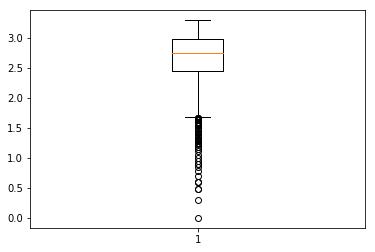

In [202]:
plt.boxplot(px_h)

In [203]:
dataset['px_height'] = px_h

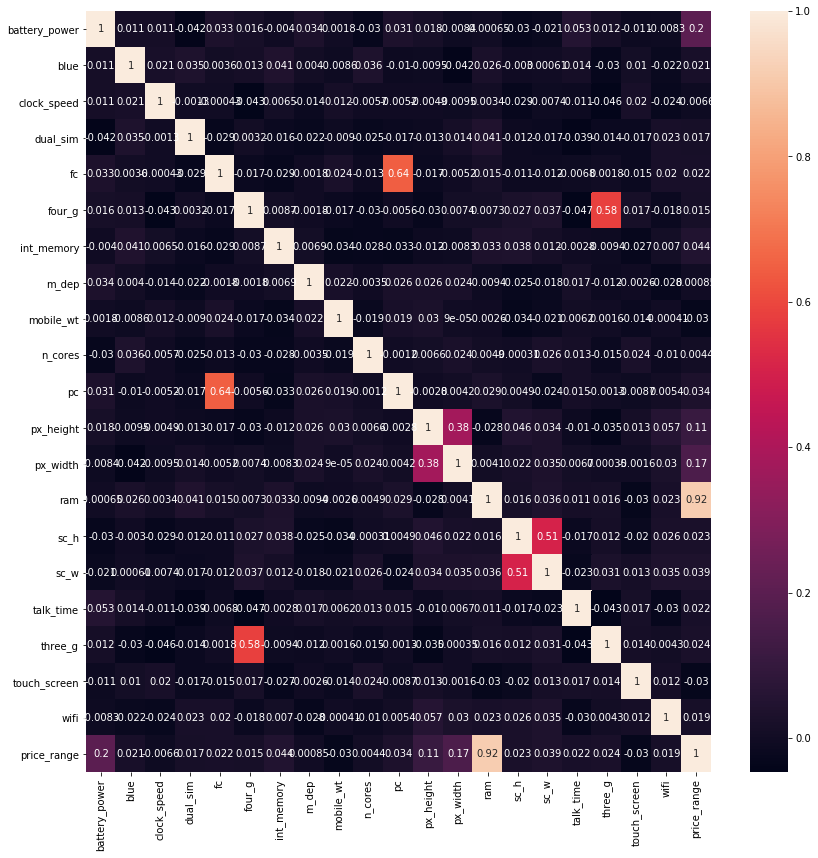

In [206]:
fig,ax = plt.subplots(figsize = (14,14))
sns.heatmap(dataset.corr(),annot=True)

In [207]:
dataset = pd.read_csv('train.csv')
dataset.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [208]:
for i in enumerate(dataset.columns):
    print(i)

(0, 'battery_power')
(1, 'blue')
(2, 'clock_speed')
(3, 'dual_sim')
(4, 'fc')
(5, 'four_g')
(6, 'int_memory')
(7, 'm_dep')
(8, 'mobile_wt')
(9, 'n_cores')
(10, 'pc')
(11, 'px_height')
(12, 'px_width')
(13, 'ram')
(14, 'sc_h')
(15, 'sc_w')
(16, 'talk_time')
(17, 'three_g')
(18, 'touch_screen')
(19, 'wifi')
(20, 'price_range')


In [209]:
X = dataset.iloc[:,[0,11,12,13]]
y = dataset.iloc[:,-1]

In [211]:
X.iloc[[1481,1933],1] = X['px_height'].mean()

C:\Anaconda\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [214]:
max_acc = 0
max_rs = 0
for i in range(1001):    
    Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,random_state = i)
    #model6 = KNeighborsClassifier(n_neighbors=9)
    model5.fit(Xtrain,ytrain)
    pred = model5.predict(Xtest)
    cm = confusion_matrix(ytest,pred)
    print(cm,end = '\n\n')
    accuracy = (cm[0][0]+cm[1][1]+cm[2][2]+cm[3][3])/500
    print(i,accuracy,sep = "==>")
    if(accuracy>max_acc):
        max_acc = accuracy
        max_rs = i
    if(i%100==0):
        print("Maximum Accuracy till now: "+str(max_acc))

[[119   5   0   0]
 [  4  98   8   0]
 [  0  15 103   7]
 [  0   0  13 128]]

0==>0.896
Maximum Accuracy till now: 0.896
[[106  10   0   0]
 [  5 112   9   0]
 [  0  17 109   9]
 [  0   0  16 107]]

1==>0.868
[[119   3   0   0]
 [ 15 113   5   0]
 [  0   7 105   7]
 [  0   0   7 119]]

2==>0.912
[[115   5   0   0]
 [  9 117   6   0]
 [  0   8 102   7]
 [  0   0  13 118]]

3==>0.904
[[121   8   0   0]
 [  6 116   7   0]
 [  0   6  98   9]
 [  0   0  14 115]]

4==>0.9
[[123   6   0   0]
 [ 15 101   2   0]
 [  0  12 113   4]
 [  0   0  10 114]]

5==>0.902
[[120   2   0   0]
 [  7 122   7   0]
 [  0  12 105   6]
 [  0   0  18 101]]

6==>0.896
[[130   6   0   0]
 [  6  97   7   0]
 [  0   9 116   6]
 [  0   0  13 110]]

7==>0.906
[[117   6   0   0]
 [  6 119   1   0]
 [  0  13 104   8]
 [  0   0   8 118]]

8==>0.916
[[121   9   0   0]
 [  9 108   4   0]
 [  0  18 103   3]
 [  0   0  10 115]]

9==>0.894
[[113   5   0   0]
 [ 11 111   4   0]
 [  0  13 109  12]
 [  0   0   5 117]]

10==>0.9
[[

[[105   3   0   0]
 [ 10 106   4   0]
 [  0  14 112  11]
 [  0   0   6 129]]

97==>0.904
[[123   3   0   0]
 [  8  98   4   0]
 [  0  20 103   5]
 [  0   0  13 123]]

98==>0.894
[[108   7   0   0]
 [  9 113   4   0]
 [  0  14 112  10]
 [  0   0  12 111]]

99==>0.888
[[129   6   0   0]
 [  9 104  10   0]
 [  0  13  96   9]
 [  0   0  11 113]]

100==>0.884
Maximum Accuracy till now: 0.926
[[108   7   0   0]
 [  7 112   3   0]
 [  0  14 131   7]
 [  0   0   6 105]]

101==>0.912
[[105   5   0   0]
 [ 12 113   5   0]
 [  0  21  95   6]
 [  0   0   7 131]]

102==>0.888
[[121   9   0   0]
 [ 10 107   4   0]
 [  0  12 105   3]
 [  0   0   5 124]]

103==>0.914
[[102   4   0   0]
 [ 12 117   7   0]
 [  0  13 111   4]
 [  0   0  12 118]]

104==>0.896
[[126   6   0   0]
 [  5 105   4   0]
 [  0   9 105  10]
 [  0   0   9 121]]

105==>0.914
[[124   1   0   0]
 [ 11 111  11   0]
 [  0   7 105   8]
 [  0   0  18 104]]

106==>0.888
[[126   7   0   0]
 [  7 106   8   0]
 [  0   9 100  10]
 [  0   0  13

[[118   3   0   0]
 [ 12 125   4   0]
 [  0  11  99   5]
 [  0   0  12 111]]

190==>0.906
[[124   6   0   0]
 [  5 107   2   0]
 [  0  16 107   4]
 [  0   0  17 112]]

191==>0.9
[[122   8   0   0]
 [  9 106  14   0]
 [  0   4 108  10]
 [  0   0  15 104]]

192==>0.88
[[125   5   0   0]
 [ 12  93   8   0]
 [  0   8 117   6]
 [  0   0  17 109]]

193==>0.888
[[125   7   0   0]
 [  8 123   4   0]
 [  0  12  84  17]
 [  0   0  11 109]]

194==>0.882
[[114   5   0   0]
 [  9 114   6   0]
 [  0   6 109   3]
 [  0   0  14 120]]

195==>0.914
[[124   4   0   0]
 [  6 103   7   0]
 [  0   5 110   8]
 [  0   0   5 128]]

196==>0.93
[[122   4   0   0]
 [  9 104   6   0]
 [  0   9 108   5]
 [  0   0  10 123]]

197==>0.914
[[120   3   0   0]
 [ 12 112   7   0]
 [  0   9 110  10]
 [  0   0  14 103]]

198==>0.89
[[145   7   0   0]
 [  8 108   5   0]
 [  0  20 107   8]
 [  0   0   8  84]]

199==>0.888
[[124   7   0   0]
 [ 11 112  10   0]
 [  0   7  99  12]
 [  0   0   9 109]]

200==>0.888
Maximum Accurac

[[126   6   0   0]
 [  8  94   3   0]
 [  0  16 130   7]
 [  0   0  10 100]]

282==>0.9
[[112   6   0   0]
 [  6 108   8   0]
 [  0  14  97  12]
 [  0   0   5 132]]

283==>0.898
[[115   6   0   0]
 [ 14 109   6   0]
 [  0   7 112   4]
 [  0   0  14 113]]

284==>0.898
[[113   9   0   0]
 [  5 117   6   0]
 [  0   8 106  10]
 [  0   0  15 111]]

285==>0.894
[[123   6   0   0]
 [  7 117   3   0]
 [  0  11 112   8]
 [  0   0   9 104]]

286==>0.912
[[118   7   0   0]
 [ 18 105   9   0]
 [  0   7 103   4]
 [  0   0  21 108]]

287==>0.868
[[117   8   0   0]
 [ 13 105  10   0]
 [  0  14  95   8]
 [  0   0  12 118]]

288==>0.87
[[123   8   0   0]
 [  4 110   9   0]
 [  0  11  94  10]
 [  0   0  11 120]]

289==>0.894
[[123  14   0   0]
 [  7  96   9   0]
 [  0  12 102   8]
 [  0   0  10 119]]

290==>0.88
[[126   4   0   0]
 [ 13  99  12   0]
 [  0  14 103   8]
 [  0   0  11 110]]

291==>0.876
[[116  10   0   0]
 [  8 111   5   0]
 [  0  10 118  10]
 [  0   0   6 106]]

292==>0.902
[[116   4   0 

[[124   9   0   0]
 [  8 104   6   0]
 [  0   9  97   9]
 [  0   0  11 123]]

375==>0.896
[[112   7   0   0]
 [  9 115   5   0]
 [  0  17 103   7]
 [  0   0  13 112]]

376==>0.884
[[113   8   0   0]
 [  8 113   2   0]
 [  0  11 101   6]
 [  0   0  10 128]]

377==>0.91
[[119   4   0   0]
 [  6 113   3   0]
 [  0  12 117   3]
 [  0   0  11 112]]

378==>0.922
[[123  10   0   0]
 [  5 107   5   0]
 [  0  13  92   7]
 [  0   0  17 121]]

379==>0.886
[[122   9   0   0]
 [ 16 116   8   0]
 [  0  11  84  10]
 [  0   0  15 109]]

380==>0.862
[[107   3   0   0]
 [  8 125   6   0]
 [  0   5 106   7]
 [  0   0  13 120]]

381==>0.916
[[107   6   0   0]
 [ 12 111   3   0]
 [  0  16 111   8]
 [  0   0  13 113]]

382==>0.884
[[119   8   0   0]
 [  8 118   1   0]
 [  0   8 106  14]
 [  0   0  12 106]]

383==>0.898
[[113  10   0   0]
 [  9 111   8   0]
 [  0  15 103   5]
 [  0   0  16 110]]

384==>0.874
[[119   7   0   0]
 [ 10 111   5   0]
 [  0  11  91   7]
 [  0   0  14 125]]

385==>0.892
[[105   2  

[[120   6   0   0]
 [  5 112   4   0]
 [  0   6  95   9]
 [  0   0  14 129]]

466==>0.912
[[115   3   0   0]
 [ 12 103   6   0]
 [  0   8 112   7]
 [  0   0   9 125]]

467==>0.91
[[130   6   0   0]
 [  7 107   3   0]
 [  0  12 105   8]
 [  0   0  16 106]]

468==>0.896
[[116   7   0   0]
 [  9 115   2   0]
 [  0   9 103   3]
 [  0   0  18 118]]

469==>0.904
[[119   3   0   0]
 [  8 102   8   0]
 [  0  12 104   6]
 [  0   0   5 133]]

470==>0.916
[[118   3   0   0]
 [ 13 108  10   0]
 [  0   7  98  10]
 [  0   0   9 124]]

471==>0.896
[[100   7   0   0]
 [  8 110   9   0]
 [  0   9  95   4]
 [  0   0  16 142]]

472==>0.894
[[130   6   0   0]
 [  8 113   5   0]
 [  0  14  91  10]
 [  0   0  15 108]]

473==>0.884
[[119   9   0   0]
 [ 15 106   8   0]
 [  0  10 109   3]
 [  0   0   6 115]]

474==>0.898
[[107   1   0   0]
 [ 17 114   5   0]
 [  0  11 114   5]
 [  0   0  11 115]]

475==>0.9
[[132   4   0   0]
 [  5 124   8   0]
 [  0   7 101   5]
 [  0   0  12 102]]

476==>0.918
[[123   7   0

[[117   8   0   0]
 [  9 111   8   0]
 [  0   8 112   6]
 [  0   0  14 107]]

558==>0.894
[[109   4   0   0]
 [ 11  98   6   0]
 [  0   7 112   7]
 [  0   0  12 134]]

559==>0.906
[[124   6   0   0]
 [ 13 105   6   0]
 [  0  10 105   8]
 [  0   0   5 118]]

560==>0.904
[[118   2   0   0]
 [ 13 108   9   0]
 [  0  10 113  10]
 [  0   0  11 106]]

561==>0.89
[[112   3   0   0]
 [ 10 117   6   0]
 [  0   9  98   3]
 [  0   0  13 129]]

562==>0.912
[[120   8   0   0]
 [ 12 104   3   0]
 [  0  12 107   9]
 [  0   0  14 111]]

563==>0.884
[[117   7   0   0]
 [ 12 103   6   0]
 [  0  11 111   7]
 [  0   0  11 115]]

564==>0.892
[[116   5   0   0]
 [  6 117   8   0]
 [  0   6 103   7]
 [  0   0  20 112]]

565==>0.896
[[118   6   0   0]
 [ 12 119   4   0]
 [  0  22 104   5]
 [  0   0   8 102]]

566==>0.886
[[120   7   0   0]
 [ 10 112   3   0]
 [  0  13 104   8]
 [  0   0  14 109]]

567==>0.89
[[138  10   0   0]
 [  6  99   4   0]
 [  0   9  99  11]
 [  0   0  11 113]]

568==>0.898
[[110   5   

[[110   7   0   0]
 [  8 121   6   0]
 [  0   9 101   6]
 [  0   0  14 118]]

650==>0.9
[[123   6   0   0]
 [  9 106   5   0]
 [  0   8 113   3]
 [  0   0   6 121]]

651==>0.926
[[125   5   0   0]
 [ 11 102   6   0]
 [  0   8 113  10]
 [  0   0  10 110]]

652==>0.9
[[122   9   0   0]
 [  9 103   7   0]
 [  0  12  89  14]
 [  0   0  15 120]]

653==>0.868
[[128   3   0   0]
 [  8 118   1   0]
 [  0  10  95  11]
 [  0   0  14 112]]

654==>0.906
[[122   8   0   0]
 [  4 101   6   0]
 [  0  15 114   5]
 [  0   0  13 112]]

655==>0.898
[[126   2   0   0]
 [  9 102   4   0]
 [  0  15 112  11]
 [  0   0   9 110]]

656==>0.9
[[124   4   0   0]
 [ 15  97   8   0]
 [  0   9 104   3]
 [  0   0  14 122]]

657==>0.894
[[117   4   0   0]
 [ 13 109   5   0]
 [  0   5 107   3]
 [  0   0  16 121]]

658==>0.908
[[128   2   0   0]
 [  8 114   8   0]
 [  0   3 104   8]
 [  0   0   7 118]]

659==>0.928
[[127  10   0   0]
 [  5  95   6   0]
 [  0   9 105   9]
 [  0   0   8 126]]

660==>0.906
[[124   7   0   

[[114   5   0   0]
 [ 11 115  13   0]
 [  0  16  91  10]
 [  0   0   8 117]]

743==>0.874
[[120   8   0   0]
 [  5 114   7   0]
 [  0  11 113   7]
 [  0   0  10 105]]

744==>0.904
[[115   5   0   0]
 [  7 113   5   0]
 [  0   8 110   5]
 [  0   0   9 123]]

745==>0.922
[[115   4   0   0]
 [ 12  98   6   0]
 [  0  12 115   8]
 [  0   0  20 110]]

746==>0.876
[[113   6   0   0]
 [  9 107   5   0]
 [  0   7 107   7]
 [  0   0  10 129]]

747==>0.912
[[117   6   0   0]
 [ 10 101   7   0]
 [  0  10  98  19]
 [  0   0  13 119]]

748==>0.87
[[107   4   0   0]
 [ 11 109   9   0]
 [  0   5 114   6]
 [  0   0  14 121]]

749==>0.902
[[141   4   0   0]
 [ 11 111   4   0]
 [  0   6 110   9]
 [  0   0  10  94]]

750==>0.912
[[123   7   0   0]
 [ 11 113  12   0]
 [  0  10 106   8]
 [  0   0  15  95]]

751==>0.874
[[125   7   0   0]
 [ 15 108   7   0]
 [  0  12  95   7]
 [  0   0  15 109]]

752==>0.874
[[123   5   0   0]
 [ 10 108   4   0]
 [  0  14 108   5]
 [  0   0  11 112]]

753==>0.902
[[115   5  

[[118   9   0   0]
 [ 10 111  10   0]
 [  0  16 106   7]
 [  0   0  10 103]]

836==>0.876
[[121   5   0   0]
 [ 11  99   5   0]
 [  0   6 111   4]
 [  0   0  16 122]]

837==>0.906
[[117   6   0   0]
 [  8 109   6   0]
 [  0  13 113   8]
 [  0   0  12 108]]

838==>0.894
[[105   6   0   0]
 [  9 118   7   0]
 [  0  13 109   6]
 [  0   0  20 107]]

839==>0.878
[[121   6   0   0]
 [  6 125   6   0]
 [  0   9  95   8]
 [  0   0  16 108]]

840==>0.898
[[119   4   0   0]
 [ 12 110   6   0]
 [  0   5 115   6]
 [  0   0  10 113]]

841==>0.914
[[127   9   0   0]
 [  5 109   4   0]
 [  0  18  90  10]
 [  0   0  13 115]]

842==>0.882
[[129   8   0   0]
 [  8 114   5   0]
 [  0  10 111   6]
 [  0   0  13  96]]

843==>0.9
[[132   3   0   0]
 [  5 111   2   0]
 [  0   7 105   7]
 [  0   0   9 119]]

844==>0.934
[[126   4   0   0]
 [  9  94   2   0]
 [  0  12 124   9]
 [  0   0   9 111]]

845==>0.91
[[107   5   0   0]
 [  6 110   6   0]
 [  0  14 123   8]
 [  0   0  12 109]]

846==>0.898
[[124   5   0

[[127   6   0   0]
 [  9  96  10   0]
 [  0   8 112   8]
 [  0   0  14 110]]

931==>0.89
[[118   4   0   0]
 [ 12 122   6   0]
 [  0   4 112   9]
 [  0   0   5 108]]

932==>0.92
[[106   7   0   0]
 [ 10 109   7   0]
 [  0  10 118   9]
 [  0   0   9 115]]

933==>0.896
[[120   8   0   0]
 [  9 112   3   0]
 [  0  13 117   8]
 [  0   0   8 102]]

934==>0.902
[[124   7   0   0]
 [ 13 105   6   0]
 [  0  13 106  13]
 [  0   0   8 105]]

935==>0.88
[[124   4   0   0]
 [  8 102   2   0]
 [  0  11 107   6]
 [  0   0  12 124]]

936==>0.914
[[124   7   0   0]
 [  7 107   9   0]
 [  0  11 105   8]
 [  0   0  14 108]]

937==>0.888
[[119   1   0   0]
 [  7 108   2   0]
 [  0  11 111  12]
 [  0   0  10 119]]

938==>0.914
[[124   5   0   0]
 [ 17 108   6   0]
 [  0  10 112   6]
 [  0   0  10 102]]

939==>0.892
[[117   2   0   0]
 [  8 120   6   0]
 [  0   3 107   5]
 [  0   0   7 125]]

940==>0.938
[[116   3   0   0]
 [ 13 107  12   0]
 [  0   6 105  12]
 [  0   0  14 112]]

941==>0.88
[[113   4   0 

In [215]:
max_acc,max_rs

(0.938, 940)

In [222]:
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,random_state = 940)
#model6 = KNeighborsClassifier(n_neighbors=9)
model5.fit(Xtrain,ytrain)
pred = model5.predict(Xtest)
cm = confusion_matrix(ytest,pred)
print(cm,end = '\n\n')
accuracy = (cm[0][0]+cm[1][1]+cm[2][2]+cm[3][3])/500
print(accuracy,sep = "==>")
if(accuracy>max_acc):
    max_acc = accuracy
    max_rs = i

[[117   2   0   0]
 [  9 120   5   0]
 [  0   4 105   6]
 [  0   0   7 125]]

0.934


In [232]:
t = pd.read_csv('test.csv')
t.drop(columns=['id'],inplace=True)
t.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1


In [233]:
t = t.iloc[:,[0,11,12,13]]
t.head()

,battery_power,px_height,px_width,ram
0,1043,226,1412,3476
1,841,746,857,3895
2,1807,1270,1366,2396
3,1546,295,1752,3893
4,1434,749,810,1773


In [236]:
t[t['px_height']==0]

,battery_power,px_height,px_width,ram


In [235]:
t.iloc[[420,819],1] = t['px_height'].mean()

In [237]:
predtest = model5.predict(t)

In [238]:
predtest

array([3, 3, 3, 3, 1, 3, 3, 1, 3, 0, 3, 3, 0, 0, 2, 0, 2, 1, 3, 2, 1, 3,
       1, 1, 3, 0, 2, 0, 2, 0, 3, 0, 3, 0, 0, 1, 3, 1, 2, 1, 1, 2, 0, 0,
       0, 1, 0, 3, 1, 2, 1, 0, 3, 0, 3, 1, 3, 1, 1, 3, 3, 3, 0, 1, 1, 1,
       1, 2, 1, 2, 1, 2, 2, 3, 3, 0, 2, 0, 2, 3, 0, 3, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 2, 2, 0, 2, 2, 0, 2, 1, 2, 1, 0, 0, 3, 0, 2, 0, 1, 2, 3,
       3, 3, 1, 3, 3, 3, 3, 2, 3, 0, 0, 3, 2, 1, 2, 0, 3, 2, 2, 1, 0, 2,
       1, 1, 3, 1, 1, 0, 3, 2, 1, 3, 1, 3, 2, 3, 3, 2, 2, 3, 2, 3, 0, 0,
       3, 2, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 1, 0, 3, 0, 0, 0, 2, 1, 0, 1,
       0, 0, 1, 2, 1, 0, 0, 1, 1, 2, 2, 1, 0, 0, 0, 1, 0, 3, 2, 0, 2, 2,
       2, 3, 1, 2, 3, 3, 3, 2, 2, 1, 0, 0, 1, 2, 0, 3, 3, 3, 0, 2, 0, 3,
       2, 2, 3, 1, 0, 1, 0, 3, 0, 1, 0, 2, 2, 1, 2, 0, 3, 0, 3, 1, 2, 0,
       0, 2, 1, 3, 3, 3, 2, 1, 3, 0, 0, 2, 3, 3, 1, 3, 1, 1, 3, 2, 1, 2,
       3, 3, 3, 1, 0, 1, 2, 3, 1, 1, 3, 2, 0, 3, 0, 0, 2, 0, 0, 3, 3, 3,
       3, 2, 1, 3, 3, 2, 3, 2, 2, 1, 2, 0, 2, 3, 1,

In [239]:
data = pd.DataFrame({'price_range':predtest[:]})
pd.DataFrame.to_csv(data, path_or_buf='result_RandomForest.csv', encoding='utf-8')

In [247]:
l = [3, 3, 2, 3, 1, 3, 3, 1, 3, 0, 3, 3, 0, 0, 2, 0, 2, 1, 3, 2, 1, 3, 1,
       1, 3, 0, 2, 0, 3, 0, 2, 0, 3, 0, 0, 1, 3, 1, 2, 1, 1, 2, 0, 0, 0, 1,
       0, 3, 1, 2, 1, 0, 3, 0, 3, 1, 3, 1, 1, 3, 3, 2, 0, 1, 1, 1, 2, 3, 1,
       2, 1, 2, 2, 3, 3, 0, 2, 0, 2, 3, 0, 3, 3, 0, 3, 0, 3, 1, 3, 0, 1, 2,
       2, 1, 2, 1, 0, 2, 1, 2, 1, 0, 0, 3, 0, 2, 0, 1, 2, 3, 3, 3, 1, 3, 3,
       3, 3, 1, 3, 0, 0, 3, 2, 1, 2, 0, 3, 2, 3, 1, 0, 2, 1, 1, 3, 1, 1, 0,
       3, 2, 1, 3, 1, 3, 2, 3, 3, 3, 2, 3, 2, 3, 1, 0, 3, 2, 3, 3, 3, 3, 2,
       2, 3, 3, 3, 3, 1, 0, 3, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 2, 1, 0, 0, 1,
       1, 2, 2, 1, 0, 0, 0, 0, 0, 3, 1, 0, 2, 2, 3, 3, 1, 1, 3, 3, 3, 2, 2,
       1, 1, 0, 1, 2, 0, 2, 3, 3, 0, 2, 0, 3, 2, 3, 3, 1, 0, 1, 0, 3, 0, 1,
       0, 2, 2, 1, 2, 0, 3, 0, 3, 1, 2, 0, 0, 2, 1, 3, 3, 3, 1, 1, 3, 0, 0,
       2, 3, 3, 1, 3, 1, 1, 3, 2, 1, 2, 3, 3, 3, 1, 0, 1, 2, 3, 1, 1, 3, 2,
       0, 3, 0, 0, 2, 0, 0, 3, 2, 3, 3, 2, 1, 3, 3, 2, 3, 1, 2, 1, 2, 0, 2,
       3, 1, 0, 0, 3, 0, 3, 0, 1, 2, 0, 2, 3, 1, 3, 2, 2, 1, 2, 0, 0, 0, 1,
       3, 2, 0, 0, 0, 3, 2, 0, 2, 3, 1, 2, 2, 2, 3, 1, 3, 3, 1, 2, 3, 3, 3,
       0, 3, 0, 3, 1, 3, 1, 2, 3, 0, 1, 0, 3, 1, 3, 1, 3, 0, 0, 0, 0, 2, 0,
       0, 2, 1, 1, 2, 2, 2, 0, 1, 0, 0, 3, 2, 0, 3, 1, 2, 2, 1, 2, 3, 1, 1,
       2, 2, 1, 2, 0, 1, 1, 0, 3, 2, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 2, 2, 3,
       2, 3, 0, 3, 0, 3, 0, 1, 1, 1, 2, 0, 3, 2, 3, 3, 1, 3, 1, 3, 1, 3, 2,
       0, 1, 2, 1, 1, 0, 0, 0, 1, 2, 1, 0, 3, 2, 0, 2, 2, 0, 0, 3, 1, 1, 0,
       3, 2, 3, 0, 3, 0, 2, 3, 3, 3, 0, 2, 0, 2, 3, 0, 1, 1, 0, 0, 1, 1, 1,
       3, 3, 3, 2, 3, 1, 1, 2, 3, 3, 3, 2, 0, 2, 1, 2, 2, 1, 0, 2, 2, 0, 0,
       0, 3, 1, 0, 2, 2, 2, 0, 3, 0, 2, 2, 0, 3, 0, 2, 3, 0, 1, 1, 3, 3, 1,
       1, 1, 3, 2, 0, 3, 1, 2, 0, 3, 3, 1, 2, 2, 2, 3, 0, 1, 2, 3, 1, 3, 2,
       3, 1, 1, 1, 0, 3, 1, 0, 3, 2, 3, 2, 0, 3, 3, 3, 2, 3, 3, 1, 2, 0, 2,
       3, 3, 1, 0, 1, 1, 2, 2, 2, 0, 0, 2, 2, 3, 2, 0, 2, 1, 3, 3, 0, 1, 3,
       0, 2, 1, 1, 0, 0, 2, 1, 0, 1, 1, 2, 2, 0, 2, 2, 1, 0, 3, 0, 0, 3, 2,
       0, 0, 0, 0, 0, 3, 0, 3, 1, 3, 1, 1, 3, 3, 0, 1, 1, 3, 2, 3, 2, 0, 3,
       0, 2, 0, 2, 0, 0, 1, 1, 1, 2, 1, 3, 1, 3, 2, 2, 1, 3, 2, 0, 1, 2, 0,
       3, 3, 0, 2, 1, 1, 2, 0, 3, 2, 0, 3, 2, 3, 0, 0, 3, 0, 2, 2, 3, 2, 2,
       2, 2, 1, 1, 3, 0, 1, 0, 1, 2, 1, 0, 0, 1, 0, 0, 3, 0, 1, 2, 0, 0, 1,
       1, 3, 0, 3, 2, 3, 0, 0, 1, 2, 2, 1, 0, 1, 2, 0, 1, 1, 0, 0, 3, 3, 0,
       3, 1, 2, 3, 0, 1, 0, 2, 2, 0, 3, 1, 0, 3, 0, 1, 0, 3, 3, 3, 2, 3, 0,
       3, 2, 0, 0, 0, 2, 3, 2, 0, 1, 1, 2, 1, 0, 3, 2, 0, 3, 1, 2, 1, 1, 1,
       3, 1, 1, 1, 2, 1, 0, 1, 2, 0, 3, 0, 0, 0, 0, 2, 3, 3, 3, 0, 1, 2, 1,
       1, 0, 0, 2, 1, 0, 2, 0, 3, 2, 2, 1, 2, 0, 2, 1, 3, 0, 0, 3, 2, 3, 0,
       0, 2, 3, 3, 1, 2, 2, 1, 0, 0, 2, 3, 0, 3, 0, 0, 0, 2, 2, 1, 2, 0, 3,
       2, 1, 2, 3, 3, 0, 1, 1, 2, 1, 2, 2, 0, 1, 3, 1, 1, 3, 1, 2, 3, 1, 1,
       1, 1, 3, 2, 0, 2, 3, 0, 2, 3, 2, 2, 2, 3, 2, 0, 1, 2, 0, 2, 1, 1, 2,
       2, 2, 1, 2, 1, 0, 1, 3, 1, 0, 1, 2, 3, 1, 0, 0, 3, 2, 2, 3, 0, 3, 3,
       2, 1, 3, 0, 1, 3, 1, 1, 1, 1, 3, 2, 0, 3, 0, 2, 3, 0, 3, 2, 2, 3, 1,
       0, 2, 3, 1, 0, 2, 1, 2, 1, 2, 0, 2, 2, 0, 2, 3, 2, 3, 0, 2, 1, 1, 2,
       2, 3, 3, 0, 2, 1, 2, 1, 3, 0, 1, 3, 0, 1, 0, 0, 3, 3, 2, 0, 0, 0, 0,
       3, 2, 3, 3, 0, 0, 2, 1, 0, 2, 2]

In [251]:
l = np.array(l)
l.shape

(1000,)

In [252]:
data = pd.DataFrame({'price_range':l[:]})
pd.DataFrame.to_csv(data, path_or_buf='kaggleresult.csv', encoding='utf-8')

In [255]:
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [257]:
data = pd.read_csv('train.csv')
#Splitting into X and y as per the required for Scikit learn packages
X, y = data.iloc[:,:-1], data.iloc[:,-1]

#Splitting the dataset into training and testing
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=123)

In [258]:
xg_cl = xgb.XGBClassifier(objective='multi:softmax', n_estimators=200,seed=123,learning_rate=0.15,max_depth=5,colsample_bytree=1,subsample=1)

In [259]:
xg_cl.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.15, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=200,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=123,
       silent=True, subsample=1)

In [260]:
preds = xg_cl.predict(X_test)

In [261]:
accuracy = float(np.sum(preds==y_test))/y_test.shape[0]
print("accuracy: %f" % (accuracy))

accuracy: 0.930000


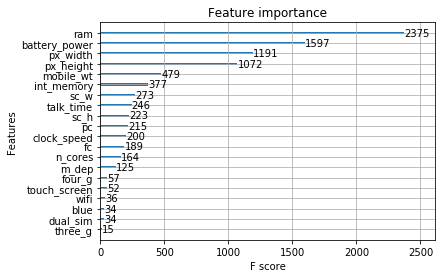

In [262]:
xgb.plot_importance(xg_cl)
plt.show()

In [263]:
testdata =pd.read_csv('test.csv')

In [264]:
testdata=testdata.drop('id',axis=1)
testdata.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1


In [265]:
test_prediction=xg_cl.predict(testdata)

In [266]:
data = pd.DataFrame({'price_range':test_prediction[:]})
pd.DataFrame.to_csv(data, path_or_buf='kaggleresult2.csv', encoding='utf-8')

In [268]:
df = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
y_t = np.array(df['price_range'])
X_t = df
X_t = df.drop(['price_range'],axis=1)
X_t = np.array(X_t)

print("shape of Y :"+str(y_t.shape))
print("shape of X :"+str(X_t.shape))

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_t = scaler.fit_transform(X_t)

shape of Y :(2000,)
shape of X :(2000, 20)


In [269]:
X_train,X_test,Y_train,Y_test = train_test_split(X_t,y_t,test_size=.20,random_state=42)
print("shape of X Train :"+str(X_train.shape))
print("shape of X Test :"+str(X_test.shape))
print("shape of Y Train :"+str(Y_train.shape))
print("shape of Y Test :"+str(Y_test.shape))

shape of X Train :(1600, 20)
shape of X Test :(400, 20)
shape of Y Train :(1600,)
shape of Y Test :(400,)


In [270]:
for this_C in [1,3,5,10,40,60,80,100]:
    clf = SVC(kernel='linear',C=this_C).fit(X_train,Y_train)
    scoretrain = clf.score(X_train,Y_train)
    scoretest  = clf.score(X_test,Y_test)
    print("Linear SVM value of C:{}, training score :{:2f} , Test Score: {:2f} \n".format(this_C,scoretrain,scoretest))

Linear SVM value of C:1, training score :0.953750 , Test Score: 0.960000 

Linear SVM value of C:3, training score :0.961875 , Test Score: 0.977500 

Linear SVM value of C:5, training score :0.968125 , Test Score: 0.975000 

Linear SVM value of C:10, training score :0.977500 , Test Score: 0.967500 

Linear SVM value of C:40, training score :0.981250 , Test Score: 0.962500 

Linear SVM value of C:60, training score :0.981250 , Test Score: 0.962500 

Linear SVM value of C:80, training score :0.981875 , Test Score: 0.970000 

Linear SVM value of C:100, training score :0.980625 , Test Score: 0.967500 



In [271]:
from sklearn.model_selection import cross_val_score,StratifiedKFold,LeaveOneOut
clf1 = SVC(kernel='linear',C=20).fit(X_train,Y_train)
scores = cross_val_score(clf1,X_train,Y_train,cv=5)
strat_scores = cross_val_score(clf1,X_train,Y_train,cv=StratifiedKFold(5,random_state=10,shuffle=True))
#Loo = LeaveOneOut()
#Loo_scores = cross_val_score(clf1,X_train,Y_train,cv=Loo)
print("The Cross Validation Score :"+str(scores))
print("The Average Cross Validation Score :"+str(scores.mean()))
print("The Stratified Cross Validation Score :"+str(strat_scores))
print("The Average Stratified Cross Validation Score :"+str(strat_scores.mean()))
#print("The LeaveOneOut Cross Validation Score :"+str(Loo_scores))
#print("The Average LeaveOneOut Cross Validation Score :"+str(Loo_scores.mean()))

The Cross Validation Score :[0.95015576 0.96261682 0.94392523 0.92789969 0.97169811]
The Average Cross Validation Score :0.9512591238085129
The Stratified Cross Validation Score :[0.95327103 0.96884735 0.95015576 0.96551724 0.95597484]
The Average Stratified Cross Validation Score :0.9587532454897574


In [272]:
from sklearn.dummy import DummyClassifier

for strat in ['stratified', 'most_frequent', 'prior', 'uniform']:
    dummy_maj = DummyClassifier(strategy=strat).fit(X_train,Y_train)
    print("Train Stratergy :{} \n Score :{:.2f}".format(strat,dummy_maj.score(X_train,Y_train)))
    print("Test Stratergy :{} \n Score :{:.2f}".format(strat,dummy_maj.score(X_test,Y_test)))

Train Stratergy :stratified 
 Score :0.26
Test Stratergy :stratified 
 Score :0.28
Train Stratergy :most_frequent 
 Score :0.26
Test Stratergy :most_frequent 
 Score :0.23
Train Stratergy :prior 
 Score :0.26
Test Stratergy :prior 
 Score :0.23
Train Stratergy :uniform 
 Score :0.25
Test Stratergy :uniform 
 Score :0.21


In [273]:
X = np.array(df.iloc[:,[0,13]])
y = np.array(df['price_range'])
print("Shape of X:"+str(X.shape))
print("Shape of y:"+str(y.shape))
X = scaler.fit_transform(X)

Shape of X:(2000, 2)
Shape of y:(2000,)


C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [275]:
h = .02  # step size in the mesh
C_param = 1 # No of neighbours
for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf1 = SVC(kernel='linear',C=C_param)
    clf1.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min()-.20, X[:, 0].max()+.20
    y_min, y_max = X[:, 1].min()-.20, X[:, 1].max()+.20
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf1.predict(np.c_[xx.ravel(), yy.ravel()])   # ravel to flatten the into 1D and c_ to concatenate 

In [276]:
print("The score of the above :"+str(clf1.score(X,y)))

The score of the above :0.825


In [277]:
from sklearn.svm import LinearSVC

for this_C in [1,3,5,10,40,60,80,100]:
    clf2 = LinearSVC(C=this_C).fit(X_train,Y_train)
    scoretrain = clf2.score(X_train,Y_train)
    scoretest  = clf2.score(X_test,Y_test)
    print("Linear SVM value of C:{}, training score :{:2f} , Test Score: {:2f} \n".format(this_C,scoretrain,scoretest))

Linear SVM value of C:1, training score :0.846250 , Test Score: 0.840000 

Linear SVM value of C:3, training score :0.864375 , Test Score: 0.855000 

Linear SVM value of C:5, training score :0.867500 , Test Score: 0.867500 

Linear SVM value of C:10, training score :0.874375 , Test Score: 0.875000 

Linear SVM value of C:40, training score :0.840625 , Test Score: 0.850000 

Linear SVM value of C:60, training score :0.729375 , Test Score: 0.752500 

Linear SVM value of C:80, training score :0.797500 , Test Score: 0.807500 

Linear SVM value of C:100, training score :0.742500 , Test Score: 0.767500 



In [278]:
from sklearn.svm import SVR

svr = SVR(kernel='linear',C=1,epsilon=.01).fit(X_train,Y_train)
print("{:.2f} is the accuracy of the SV Regressor".format(svr.score(X_train,Y_train)))

0.92 is the accuracy of the SV Regressor


In [279]:
for this_C in [1,5,10,25,50,100]:
    clf3 = SVC(kernel='rbf',C=this_C).fit(X_train,Y_train)
    clf3train = clf3.score(X_train,Y_train)
    clf3test  = clf3.score(X_test,Y_test)
    print("SVM for Non Linear \n C:{} Training Score : {:2f} Test Score : {:2f}\n".format(this_C,clf3train,clf3test))

SVM for Non Linear 
 C:1 Training Score : 0.902500 Test Score : 0.887500

SVM for Non Linear 
 C:5 Training Score : 0.957500 Test Score : 0.927500

SVM for Non Linear 
 C:10 Training Score : 0.963750 Test Score : 0.927500

SVM for Non Linear 
 C:25 Training Score : 0.979375 Test Score : 0.927500

SVM for Non Linear 
 C:50 Training Score : 0.986250 Test Score : 0.925000

SVM for Non Linear 
 C:100 Training Score : 0.993125 Test Score : 0.920000



In [280]:
h = .02  # step size in the mesh
C_param = 1 # No of neighbours
for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf1 = SVC(kernel='rbf',C=C_param)
    clf1.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min(), X[:, 0].max()
    y_min, y_max = X[:, 1].min(), X[:, 1].max()
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf1.predict(np.c_[xx.ravel(), yy.ravel()]) 

In [281]:
for this_gamma in [.1,.5,.10,.25,.50,1]:
    for this_C in [1,5,7,10,15,25,50]:
        clf3 = SVC(kernel='rbf',C=this_C,gamma=this_gamma).fit(X_train,Y_train)
        clf3train = clf3.score(X_train,Y_train)
        clf3test  = clf3.score(X_test,Y_test)
        print("SVM for Non Linear \n Gamma: {} C:{} Training Score : {:2f} Test Score : {:2f}\n".format(this_gamma,this_C,clf3train,clf3test))

SVM for Non Linear 
 Gamma: 0.1 C:1 Training Score : 0.928750 Test Score : 0.902500

SVM for Non Linear 
 Gamma: 0.1 C:5 Training Score : 0.965000 Test Score : 0.907500

SVM for Non Linear 
 Gamma: 0.1 C:7 Training Score : 0.971250 Test Score : 0.912500

SVM for Non Linear 
 Gamma: 0.1 C:10 Training Score : 0.979375 Test Score : 0.907500

SVM for Non Linear 
 Gamma: 0.1 C:15 Training Score : 0.986875 Test Score : 0.905000

SVM for Non Linear 
 Gamma: 0.1 C:25 Training Score : 0.991250 Test Score : 0.920000

SVM for Non Linear 
 Gamma: 0.1 C:50 Training Score : 0.998125 Test Score : 0.910000

SVM for Non Linear 
 Gamma: 0.5 C:1 Training Score : 0.980625 Test Score : 0.835000

SVM for Non Linear 
 Gamma: 0.5 C:5 Training Score : 1.000000 Test Score : 0.850000

SVM for Non Linear 
 Gamma: 0.5 C:7 Training Score : 1.000000 Test Score : 0.847500

SVM for Non Linear 
 Gamma: 0.5 C:10 Training Score : 1.000000 Test Score : 0.847500

SVM for Non Linear 
 Gamma: 0.5 C:15 Training Score : 1.0000

In [282]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [1,5,7,10,15,25,50],
              'gamma': [.1,.5,.10,.25,.50,1]}
GS = GridSearchCV(SVC(kernel='rbf'),param_grid,cv=5)

In [283]:
GS.fit(X_train,Y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [1, 5, 7, 10, 15, 25, 50], 'gamma': [0.1, 0.5, 0.1, 0.25, 0.5, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [284]:
print("the parameters {} are the best.".format(GS.best_params_))
print("the best score is {:.2f}.".format(GS.best_score_))

the parameters {'C': 7, 'gamma': 0.1} are the best.
the best score is 0.91.


In [285]:
svr2 = SVR(degree=2,C=100,epsilon=.01).fit(X_train,Y_train)
print("{:.2f} is the accuracy of the SV Regressor".format(svr2.score(X_train,Y_train)))

0.95 is the accuracy of the SV Regressor


In [286]:
test = test.drop(['id'],axis=1)
test.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1


In [287]:
test_mat = np.array(test)
test = scaler.fit_transform(test_mat)

In [291]:
clf4 = SVC(kernel='rbf',C=25,gamma=.1).fit(X_train,Y_train)
prediction = clf4.predict(test_mat)
pred = pd.DataFrame(prediction)
pred

,0
0,2
1,2
2,2
3,2
4,2
5,2
6,2
7,2
8,2
9,2


In [289]:
prediction = svr2.predict(test_mat)
pred = pd.DataFrame(prediction)
pred.head()

,0
0,1.600995
1,1.600995
2,1.600995
3,1.600995
4,1.600995


In [290]:
pred

,0
0,1.600995
1,1.600995
2,1.600995
3,1.600995
4,1.600995
5,1.600995
6,1.600995
7,1.600995
8,1.600995
9,1.600995
